# Prepare input data

In [1]:
from keras.datasets import mnist
import numpy as np
 
(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
 
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



Using TensorFlow backend.


# Autoencoder

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
 
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))
 
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
 
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
 
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
 
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
 
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
 
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
 
#TODO complete fit(). As a starting point set epoch to 50, batch size to 256, shuffle data, and use x_test as a validation set.
#Later You can experiment with those values
autoencoder.fit(x_train, x_train, batch_size=256, epochs=50)


# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.3627
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2644
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2431
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2221
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2060
Epoch 6/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1951
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1872
Epoch 8/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1807
Epoch 9/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1753
Epoch 10/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1706
Epoch 11/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1663
Epoch 12/50
60000/60000 [===========================

# Visualise autoencoder

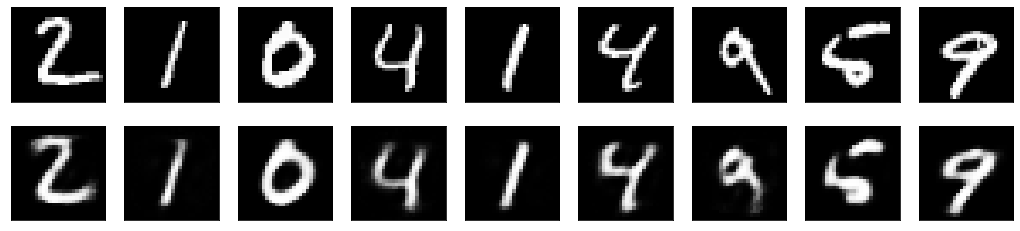

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
 
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder

In [7]:
from keras.datasets import mnist
import numpy as np
 
#TODO load MNIST data set and convert it to [0,1] range like before.
(x_train, _), (x_test, _) = mnist.load_data()
 
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
 
x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
 
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
 
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
 
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
 
autoencoder.fit(x_train, x_train, batch_size=128, epochs=10)
 
decoded_imgs = autoencoder.predict(x_test)


Epoch 1/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.2078
Epoch 2/10
60000/60000 [==============================] - 34s 567us/step - loss: 0.1502
Epoch 3/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.1370
Epoch 4/10
60000/60000 [==============================] - 35s 578us/step - loss: 0.1298
Epoch 5/10
60000/60000 [==============================] - 35s 583us/step - loss: 0.1247
Epoch 6/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.1215
Epoch 7/10
60000/60000 [==============================] - 34s 566us/step - loss: 0.1188
Epoch 8/10
60000/60000 [==============================] - 35s 579us/step - loss: 0.1165
Epoch 9/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.1146
Epoch 10/10
60000/60000 [==============================] - 39s 655us/step - loss: 0.1133


# Visualize convolutional autoencoder

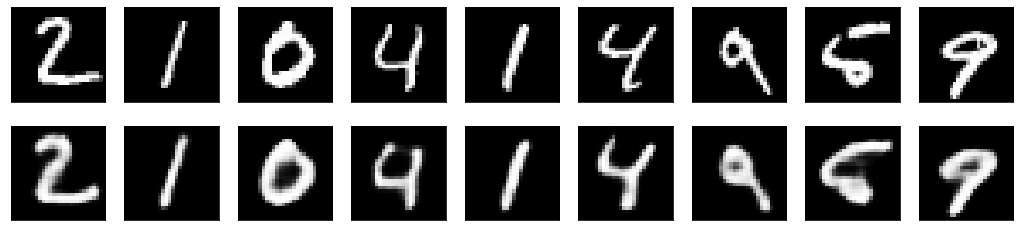

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
 
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()